## Final Notebook Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
# Loading in the given data set into variable housing_df
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
# Checking to see if any columns in the dataframe have any NaN values
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We see waterfront, view and yr_renocated columns are the only columns with NaN values.

In [4]:
# Grabbing the age of the home
housing_df['datetime'] = pd.to_datetime(housing_df['date'])
housing_df['soldyear'] = housing_df['datetime'].dt.year
housing_df['age_when_sold'] = housing_df['soldyear'] - housing_df['yr_built']

In [5]:
# Just getting the numeric values of Graade
housing_df['grade_num'] = housing_df['grade'].str.split()
housing_df['grade_num'] = housing_df['grade_num'].str[0]
housing_df['grade_num'] = housing_df['grade_num'].astype(int)

In [6]:
# Creating a new column 'Basement' that will have a value of 1 or 0 in reference to whther a house has a basement or not.
housing_df['sqft_basement'] = housing_df['sqft_living'] - housing_df['sqft_above']
housing_df['Basement'] = None
housing_df['Basement'] = housing_df['sqft_basement'].map(lambda x: False if x == 0 else True)
housing_df['Basement'] = housing_df['Basement'].astype(int)

In [7]:
housing_df.condition.value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [8]:
# Changing all the values in the 'condition' column to integers.
replace_dict2 = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
housing_df['condition'] = housing_df['condition'].replace(replace_dict2)

In [9]:
wtr_col = housing_df[['waterfront']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NO')
imputer.fit(wtr_col)
waterfront_imputed = imputer.transform(wtr_col)
housing_df.waterfront = waterfront_imputed

In [10]:
wtr_col = housing_df[['waterfront']]
encoder_wtr = OrdinalEncoder()
encoder_wtr.fit(wtr_col)
encoded_wtr = encoder_wtr.transform(wtr_col)
encoded_wtr = encoded_wtr.flatten()
housing_df.waterfront = encoded_wtr

In [11]:
view_col = housing_df[['view']]
imputer = SimpleImputer(strategy='constant', fill_value = 'NONE')
imputer.fit(view_col)
view_imputed = imputer.transform(view_col)
housing_df.view = view_imputed

In [12]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
datetime            0
soldyear            0
age_when_sold       0
grade_num           0
Basement            0
dtype: int64

We don't see much usage in certain columns or we have already used the column information to its max and will no longer be needing them.

In [13]:
housing_ols = housing_df.drop(['datetime', 'date', 'soldyear', 'yr_built', 'lat', 'long',
 'sqft_above', 'sqft_lot15', 'sqft_living15', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated'], axis = 1)

In [14]:
housing_ols

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,age_when_sold,grade_num,Basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,NONE,3,98178,59,7,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,NONE,3,98125,63,7,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,NONE,3,98028,82,6,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,NONE,5,98136,49,7,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,NONE,3,98074,28,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,NONE,3,98103,5,8,0
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,NONE,3,98146,1,8,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,NONE,3,98144,5,7,0
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,NONE,3,98027,11,8,0


With new working dataframe we want to see how the remaining columns correlates to our target,price, as well as to other columns to check for collinearity

In [15]:
housing_ols.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,zipcode,age_when_sold,grade_num,Basement
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.023803,-0.008211,-0.021458,0.008188,0.002585
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,-0.053402,-0.053890,0.667951,0.180082
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,-0.154092,-0.155817,0.356563,0.162186
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,-0.204786,-0.507561,0.665838,0.162766
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,-0.199802,-0.318592,0.762779,0.204324
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,-0.129586,-0.052853,0.114731,-0.035227
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,-0.059541,-0.489514,0.458794,-0.256545
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.028923,0.024406,0.082818,0.040061
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,0.002888,0.360836,-0.146896,0.135211
zipcode,-0.008211,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,0.028923,0.002888,1.000000,0.347206,-0.185771,0.162861


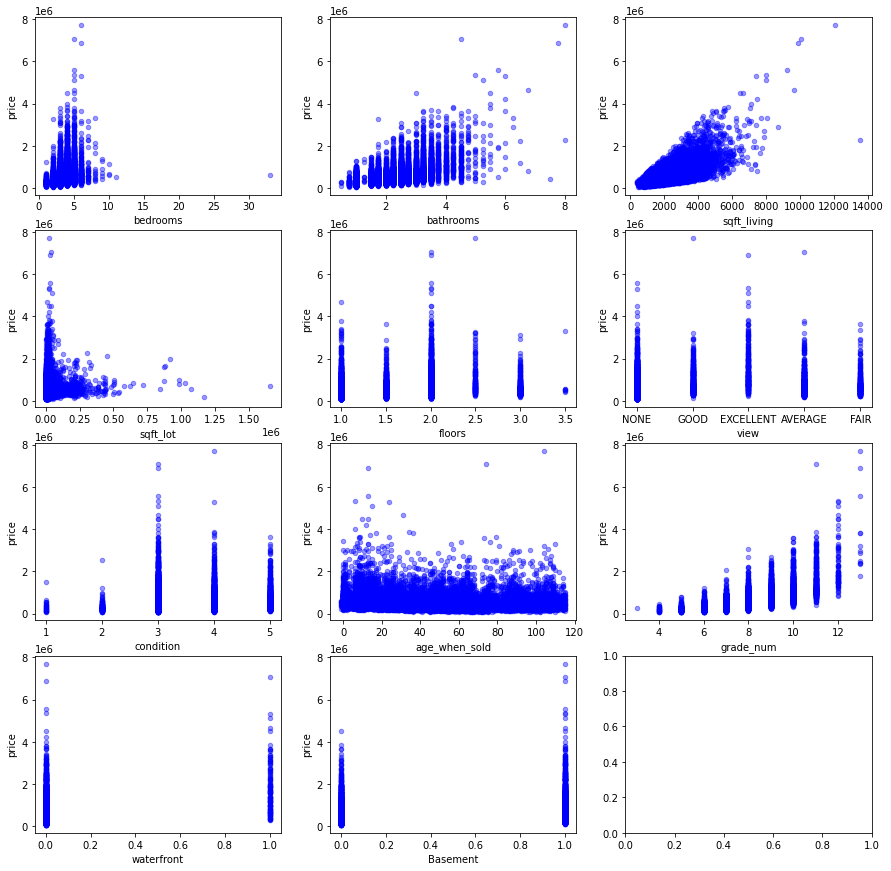

In [16]:
# Visually inspecting all columns association with price
fig, (axes1, axes2, axes3, axes4) = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living'], axes1):
    housing_ols.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
for xcols, axs in zip(['sqft_lot', 'floors', 'view'], axes2):
    housing_ols.plot(kind='scatter', x=xcols, y='price', ax=axs, alpha=0.4, color='b')
for xcolss, axss in zip(['condition', 'age_when_sold', 'grade_num'], axes3):
    housing_ols.plot(kind='scatter', x=xcolss, y='price', ax=axss, alpha=0.4, color='b')
for xcolss, axss in zip(['waterfront', 'Basement'], axes4):
    housing_ols.plot(kind='scatter', x=xcolss, y='price', ax=axss, alpha=0.4, color='b')

Many other columns are deemed as categorical values so with OneHotEncoder we will make columns for each of the categories found within each column and concat them all into one dataframe.

In [17]:
housing_pred = housing_ols.copy()
bedrooms_ohe = housing_pred[['bedrooms']]
ohe_bedrooms = OneHotEncoder(categories ='auto', sparse =False)
ohe_bedrooms.fit(bedrooms_ohe)
ohe_bedrooms_encoded = ohe_bedrooms.transform(bedrooms_ohe)
bedrooms_encoded_ohe = pd.DataFrame(ohe_bedrooms_encoded, columns = ohe_bedrooms.get_feature_names(['bedrooms']), index = housing_pred.index )
housing_pred1 = pd.concat([housing_pred, bedrooms_encoded_ohe ], axis =1)

In [18]:
grade_num_ohe = housing_pred[['grade_num']]
ohe_grade_num = OneHotEncoder(categories ='auto', sparse =False)
ohe_grade_num.fit(grade_num_ohe)
ohe_grade_num_encoded = ohe_grade_num.transform(grade_num_ohe)
grade_num_encoded_ohe = pd.DataFrame(ohe_grade_num_encoded, columns = ohe_grade_num.get_feature_names(['grade_num']), index = housing_pred.index )
housing_pred2 = pd.concat([housing_pred1, grade_num_encoded_ohe], axis =1)

In [19]:
condition_ohe = housing_pred[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False)
cond_encoded_ohe = pd.DataFrame (ohe.fit_transform(condition_ohe))
cond_encoded_ohe.columns = ohe.get_feature_names(['condition'])
housing_pred3 = pd.concat([housing_pred2, cond_encoded_ohe], axis = 1)

In [20]:
bathrooms_ohe = housing_pred[['bathrooms']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
bathrooms_transform = ohe.fit_transform(bathrooms_ohe)
bathrooms_encoded_ohe = pd.DataFrame(bathrooms_transform, columns=ohe.get_feature_names(['bathrooms']), index=housing_pred.index)
housing_pred4 = pd.concat([housing_pred3, bathrooms_encoded_ohe], axis = 1)

In [21]:
view_ohe = housing_pred[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False)
ohe.fit(view_ohe)
view_encoded = ohe.transform(view_ohe)
view_encoded_ohe =pd.DataFrame(view_encoded, columns=ohe.get_feature_names(['view']), index=housing_pred.index)
housing_pred5 = pd.concat([housing_pred4, view_encoded_ohe], axis = 1)

In [22]:
floors_ohe = housing_pred[['floors']]
ohe_floors = OneHotEncoder(categories ='auto', sparse =False)
ohe_floors.fit(floors_ohe)
ohe_floors_encoded = ohe_floors.transform(floors_ohe)
floors_encoded_ohe = pd.DataFrame(ohe_floors_encoded, columns = ohe_floors.get_feature_names(['floors']), index = housing_pred.index )
housing_pred6 = pd.concat([housing_pred5, floors_encoded_ohe ], axis =1)

In [23]:
zipcode_ohe = housing_pred[['zipcode']]
ohe = OneHotEncoder(categories="auto", sparse=False)
ohe.fit(zipcode_ohe)
zipcode_encoded = ohe.transform(zipcode_ohe)
zipcode_encoded_ohe =pd.DataFrame(zipcode_encoded, columns=ohe.get_feature_names(['zipcode']), index=housing_pred.index)
housing_pred_final = pd.concat([housing_pred6, zipcode_encoded_ohe ], axis =1)

In [24]:
housing_pred_final.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=152)

In [25]:
# Final dataframe after dealing with the catgoricals and dropping the original columns.
housing_pred_final.drop(['id', 'floors', 'bedrooms', 'bathrooms', 'view', 'condition', 'zipcode', 'grade_num'], axis = 1, inplace=True)

After creating new columns from OneHotEncoding many of the original columns we want to see if this will impact the correlation chart in reference to price.

In [26]:
housing_pred_final.corr()

,price,sqft_living,sqft_lot,waterfront,age_when_sold,Basement,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
price,1.000000,0.701917,0.089876,0.264306,-0.053890,0.180082,-0.057847,-0.144740,-0.184059,0.177351,...,-0.057217,-0.035762,-0.046074,-0.022561,-0.091703,0.040503,-0.069286,-0.054438,-0.074064,0.083688
sqft_living,0.701917,1.000000,0.173453,0.104637,-0.318592,0.204324,-0.124270,-0.350461,-0.273109,0.353324,...,-0.058106,-0.026323,-0.046455,-0.001475,-0.074826,0.028933,-0.042364,-0.024066,-0.041815,0.010832
sqft_lot,0.089876,0.173453,1.000000,0.021459,-0.052853,-0.035227,0.002243,-0.027755,-0.015102,0.026776,...,-0.017066,-0.007625,-0.016883,-0.003925,-0.010386,-0.008433,-0.018171,-0.009560,-0.012657,-0.028480
waterfront,0.264306,0.104637,0.021459,1.000000,0.024406,0.040061,0.015939,0.015811,-0.014085,-0.011549,...,0.019966,-0.004244,0.007887,0.064380,-0.009265,-0.003787,0.037313,-0.006567,0.035501,-0.005371
age_when_sold,-0.053890,-0.318592,-0.052853,0.024406,1.000000,0.167723,0.092855,0.203211,-0.025154,-0.130469,...,0.060473,0.013535,0.048731,0.049736,0.069794,0.037670,0.059367,0.015064,0.016741,0.060139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zipcode_98177,0.040503,0.028933,-0.008433,-0.003787,0.037670,0.042823,-0.001420,-0.005891,0.004309,-0.001156,...,-0.012708,-0.005623,-0.015873,-0.011925,-0.012276,1.000000,-0.012113,-0.008702,-0.012528,-0.013341
zipcode_98178,-0.069286,-0.042364,-0.018171,0.037313,0.059367,0.022552,-0.001685,0.022193,-0.012892,-0.004981,...,-0.012883,-0.005701,-0.016092,-0.012089,-0.012445,-0.012113,1.000000,-0.008822,-0.012700,-0.013525
zipcode_98188,-0.054438,-0.024066,-0.009560,-0.006567,0.015064,-0.001731,-0.007618,0.001087,-0.002190,-0.000424,...,-0.009255,-0.004095,-0.011560,-0.008684,-0.008940,-0.008702,-0.008822,1.000000,-0.009123,-0.009716
zipcode_98198,-0.074064,-0.041815,-0.012657,0.035501,0.016741,-0.007569,0.014929,0.012526,0.007919,-0.013373,...,-0.013324,-0.005896,-0.016642,-0.012503,-0.012871,-0.012528,-0.012700,-0.009123,1.000000,-0.013988


Since it is a far bigger dataframe can't visually inspect all the values to search for collinearity with the other predictors. Therefore have to colinear pairs another way. Any of the predictors with correlation of.75 or higher will be something that will have to be addressed.

In [27]:
# Breaking down the correlation table to find pairings of .75 or higher that aren't to our target price
df=housing_pred_final.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zipping the variable name columns in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# setting index to pairs
df.set_index(['pairs'], inplace = True)

#dropping level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# renaming correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates.
df.drop_duplicates(inplace=True)



df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(condition_4, condition_3)",0.812294
"(floors_1.0, floors_2.0)",0.775976


condition_4, condition_3 have correlation number of .812294 while floors_1, floors_2 have a correlation value of .775976

With our dataframe now dealt with we can now created our dummy regressor

In [28]:
# Putting our target in the y_dummy variable and the rest of the dataframe without price in the X_dummy variable
X_dummy = housing_pred_final.drop('price', axis = 1)
y_dummy = housing_pred_final['price']

# Splitting up our dummy variables into two subsets: for training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_dummy, test_size=0.2, random_state=42)

# Setting up our dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
print(dummy_regr.score(X_train, y_train))
print(dummy_regr.score(X_test, y_test))

0.0
-0.00028681792529150485


We will now make a simple linear regressor model 

<AxesSubplot:>

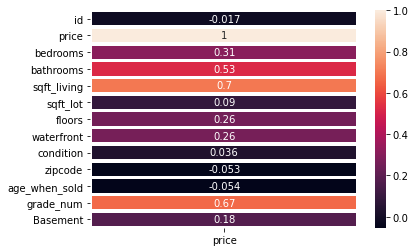

In [29]:
# Creating a heat map to decide which of our columns we will use as our independent variable to our dependent 
# variable price 
heat_map = housing_ols.corr()
heat_map_price = heat_map[['price']]
sns.heatmap(heat_map_price, annot=True, linewidths =2.5)

We can see from the heat map, that focuses on price, that sqft_living has the highest correlation to price.

In [30]:
# y variable will always be our target which is price and X variable will contain our housing features
# Here in our simple model, X is only sqft_living
simple_model_df = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living']], axis = 1)
X_simple = simple_model_df.drop('price', axis = 1)
y_simple = simple_model_df['price']

# Splitting up our dummy variables into two subsets: for training data and testing data
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Setting up simple linear regression
simple_reg = LinearRegression()
simple_reg.fit(X_train_s, y_train_s)
print(simple_reg.score(X_train_s, y_train_s))
print(simple_reg.score(X_test_s, y_test_s))

# Calculating predicted value of our model 
# determine the mean squared error for train and test data
y_hat_train_s = simple_reg.predict(X_train_s)
y_hat_test_s = simple_reg.predict(X_test_s)
train_mse_s = mean_squared_error(y_train_s, y_hat_train_s)
test_mse_s = mean_squared_error(y_test_s, y_hat_test_s)
print('Train Mean Squarred Error:', train_mse_s)
print('Test Mean Squarred Error:', test_mse_s)

0.49249290659878187
0.49332469237979504
Train Mean Squarred Error: 69086961740.93782
Test Mean Squarred Error: 65977373783.61759


In [31]:
# y variable will always be our target which is price and X variable will contain our housing features
# This is our first muliple linear regression model with just sqft_living and view
multi_model_1 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], view_encoded_ohe], axis = 1)
X_multi1 = multi_model_1.drop('price', axis = 1)
y_multi1 = multi_model_1['price']

# Splitting up our dummy variables into two subsets: for training data and testing data
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_multi1, y_multi1, test_size=0.2, random_state=42)

# Setting up our first multiple linear regression
multi1_reg = LinearRegression()
multi1_reg.fit(X_train_m1, y_train_m1)
print(multi1_reg.score(X_train_m1, y_train_m1))
print(multi1_reg.score(X_test_m1, y_test_m1))

# Calculating predicted value of our model 
# determine the mean squared error for train and test data
y_hat_train_m1 = multi1_reg.predict(X_train_m1)
y_hat_test_m1 = multi1_reg.predict(X_test_m1)
train_mse_m1 = mean_squared_error(y_train_m1, y_hat_train_m1)
test_mse_m1 = mean_squared_error(y_test_m1, y_hat_test_m1)
print('Train Mean Squarred Error:', train_mse_m1)
print('Test Mean Squarred Error:', test_mse_m1)

0.5424908222182263
0.5435522225645003
Train Mean Squarred Error: 62280743407.3619
Test Mean Squarred Error: 59436931643.68157


In [32]:
# Above Steps repeated with different combinations of housing features to see if it improves our model
# Multiple Linear Regression Model number 2

multi_model_2 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], view_encoded_ohe, cond_encoded_ohe], axis = 1)
X_multi2 = multi_model_2.drop('price', axis = 1)
y_multi2 = multi_model_2['price']

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_multi2, y_multi2, test_size=0.2, random_state=42)

multi2_reg = LinearRegression()
multi2_reg.fit(X_train_m2, y_train_m2)
print(multi2_reg.score(X_train_m2, y_train_m2))
print(multi2_reg.score(X_test_m2, y_test_m2))

y_hat_train_m2 = multi2_reg.predict(X_train_m2)
y_hat_test_m2 = multi2_reg.predict(X_test_m2)
train_mse_m2 = mean_squared_error(y_train_m2, y_hat_train_m2)
test_mse_m2 = mean_squared_error(y_test_m2, y_hat_test_m2)
print('Train Mean Squarred Error:', train_mse_m2)
print('Test Mean Squarred Error:', test_mse_m2)

0.5478229394408431
0.5451114161992303
Train Mean Squarred Error: 61554882067.989655
Test Mean Squarred Error: 59233899248.59054


In [33]:
# Above Steps repeated with different combinations of housing features to see if it improves our model
# Multiple Linear Regression Model number 3

multi_model_3 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], zipcode_encoded_ohe], axis = 1)
X_multi3 = multi_model_3.drop('price', axis = 1)
y_multi3 = multi_model_3['price']

X_train_m3, X_test_m3, y_train_m3, y_test_m3 = train_test_split(X_multi3, y_multi3, test_size=0.2, random_state=42)

multi3_reg = LinearRegression()
multi3_reg.fit(X_train_m3, y_train_m3)
print(multi3_reg.score(X_train_m3, y_train_m3))
print(multi3_reg.score(X_test_m3, y_test_m3))

y_hat_train_m3 = multi3_reg.predict(X_train_m3)
y_hat_test_m3 = multi3_reg.predict(X_test_m3)
train_mse_m3 = mean_squared_error(y_train_m3, y_hat_train_m3)
test_mse_m3 = mean_squared_error(y_test_m3, y_hat_test_m3)
print('Train Mean Squarred Error:', train_mse_m3)
print('Test Mean Squarred Error:', test_mse_m3)

0.7328746273790467
0.7158407111105953
Train Mean Squarred Error: 36363788089.37699
Test Mean Squarred Error: 37002165558.84831


In [34]:
# Above Steps repeated with different combinations of housing features to see if it improves our model
# Multiple Linear Regression Model number 4

multi_model_4 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], zipcode_encoded_ohe, bathrooms_encoded_ohe], axis = 1)
X_multi4 = multi_model_4.drop('price', axis = 1)
y_multi4 = multi_model_4['price']

X_train_m4, X_test_m4, y_train_m4, y_test_m4 = train_test_split(X_multi4, y_multi4, test_size=0.2, random_state=42)

multi4_reg = LinearRegression()
multi4_reg.fit(X_train_m4, y_train_m4)
print(multi4_reg.score(X_train_m4, y_train_m4))
print(multi4_reg.score(X_test_m4, y_test_m4))

# Bathrooms lead to overfit so omitted the y_hat value and mean square error calculation

0.7593855457499735
0.6979657661742272


In [35]:
# Above Steps repeated with different combinations of housing features to see if it improves our model
# Multiple Linear Regression Model number 5

multi_model_5 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], zipcode_encoded_ohe, bedrooms_encoded_ohe], axis = 1)
X_multi5 = multi_model_5.drop('price', axis = 1)
y_multi5 = multi_model_5['price']

X_train_m5, X_test_m5, y_train_m5, y_test_m5 = train_test_split(X_multi5, y_multi5, test_size=0.2, random_state=42)

multi5_reg = LinearRegression()
multi5_reg.fit(X_train_m5, y_train_m5)
print(multi5_reg.score(X_train_m5, y_train_m5))
print(multi5_reg.score(X_test_m5, y_test_m5))

y_hat_train_m5 = multi5_reg.predict(X_train_m5)
y_hat_test_m5 = multi5_reg.predict(X_test_m5)
train_mse_m5 = mean_squared_error(y_train_m5, y_hat_train_m5)
test_mse_m5 = mean_squared_error(y_test_m5, y_hat_test_m5)
print('Train Mean Squarred Error:', train_mse_m5)
print('Test Mean Squarred Error:', test_mse_m5)

0.7418669882820191
0.726388816807944
Train Mean Squarred Error: 35139657625.50343
Test Mean Squarred Error: 35628630472.69657


In [36]:
# Above Steps repeated with different combinations of housing features to see if it improves our model
# Multiple Linear Regression Model number 6

multi_model_6 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], zipcode_encoded_ohe, bedrooms_encoded_ohe, view_encoded_ohe], axis = 1)
X_multi6 = multi_model_6.drop('price', axis = 1)
y_multi6 = multi_model_6['price']

X_train_m6, X_test_m6, y_train_m6, y_test_m6 = train_test_split(X_multi6, y_multi6, test_size=0.2, random_state=42)

multi6_reg = LinearRegression()
multi6_reg.fit(X_train_m6, y_train_m6)
print(multi6_reg.score(X_train_m6, y_train_m6))
print(multi6_reg.score(X_test_m6, y_test_m6))

y_hat_train_m6 = multi6_reg.predict(X_train_m6)
y_hat_test_m6 = multi6_reg.predict(X_test_m6)
train_mse_m6 = mean_squared_error(y_train_m6, y_hat_train_m6)
test_mse_m6 = mean_squared_error(y_test_m6, y_hat_test_m6)
print('Train Mean Squarred Error:', train_mse_m6)
print('Test Mean Squarred Error:', test_mse_m6)

0.7805888466129296
0.7605237505631136
Train Mean Squarred Error: 29868449439.787064
Test Mean Squarred Error: 31183706377.180935


In [37]:
# Above Steps repeated with different combinations of housing features to see if it improves our model
# Multiple Linear Regression Model number 7

multi_model_7 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], housing_pred_final['waterfront'], zipcode_encoded_ohe, view_encoded_ohe, bedrooms_encoded_ohe], axis = 1)
X_multi7 = multi_model_7.drop('price', axis = 1)
y_multi7 = multi_model_7['price']

X_train_m7, X_test_m7, y_train_m7, y_test_m7 = train_test_split(X_multi7, y_multi7, test_size=0.2, random_state=42)

multi7_reg = LinearRegression()
multi7_reg.fit(X_train_m7, y_train_m7)
print(multi7_reg.score(X_train_m7, y_train_m7))
print(multi7_reg.score(X_test_m7, y_test_m7))

y_hat_train_m7 = multi7_reg.predict(X_train_m7)
y_hat_test_m7 = multi7_reg.predict(X_test_m7)
train_mse_m7 = mean_squared_error(y_train_m7, y_hat_train_m7)
test_mse_m7 = mean_squared_error(y_test_m7, y_hat_test_m7)
print('Train Mean Squarred Error:', train_mse_m7)
print('Test Mean Squarred Error:', test_mse_m7)

0.7911726897062954
0.7743165151964975
Train Mean Squarred Error: 28427670439.117245
Test Mean Squarred Error: 29387663874.141983


In [38]:
# Above Steps repeated with different combinations of housing features to see if it improves our model
# Multiple Linear Regression Model number 8

multi_model_8 = pd.concat([housing_pred_final['price'], housing_pred_final['sqft_living'], housing_pred_final['waterfront'], housing_pred_final['Basement'], zipcode_encoded_ohe, view_encoded_ohe, bedrooms_encoded_ohe, cond_encoded_ohe, floors_encoded_ohe], axis = 1)
X_multi8 = multi_model_8.drop('price', axis = 1)
y_multi8 = multi_model_8['price']

X_train_m8, X_test_m8, y_train_m8, y_test_m8 = train_test_split(X_multi8, y_multi8, test_size=0.2, random_state=42)

multi8_reg = LinearRegression()
multi8_reg.fit(X_train_m8, y_train_m8)
print(multi8_reg.score(X_train_m8, y_train_m8))
print(multi8_reg.score(X_test_m8, y_test_m8))

y_hat_train_m8 = multi8_reg.predict(X_train_m8)
y_hat_test_m8 = multi8_reg.predict(X_test_m8)
train_mse_m8 = mean_squared_error(y_train_m8, y_hat_train_m8)
test_mse_m8 = mean_squared_error(y_test_m8, y_hat_test_m8)
print('Train Mean Squarred Error:', train_mse_m8)
print('Test Mean Squarred Error:', test_mse_m8)

0.7987394059800336
-2304957762.504476
Train Mean Squarred Error: 27397613037.939194
Test Mean Squarred Error: 3.0014302578206337e+20


In [39]:
cross_val_score(multi8_reg, X_train, y_train, cv=5)

array([0.84238413, 0.78256231, 0.841775  , 0.80968138, 0.82938057])

In [40]:
multi8_reg.coef_

array([ 2.62071745e+02,  5.71040285e+05, -6.73131518e+04,  1.46528450e+11,
        1.46528469e+11,  1.46528467e+11,  1.46529254e+11,  1.46528815e+11,
        1.46528762e+11,  1.46528742e+11,  1.46528726e+11,  1.46528520e+11,
        1.46528591e+11,  1.46528552e+11,  1.46528537e+11,  1.46528455e+11,
        1.46528445e+11,  1.46528631e+11,  1.46528650e+11,  1.46528581e+11,
        1.46528703e+11,  1.46528466e+11,  1.46528479e+11,  1.46528468e+11,
        1.46528847e+11,  1.46528677e+11,  1.46528481e+11,  1.46529887e+11,
        1.46529031e+11,  1.46528464e+11,  1.46528557e+11,  1.46528716e+11,
        1.46528663e+11,  1.46528508e+11,  1.46528551e+11,  1.46528501e+11,
        1.46528546e+11,  1.46528528e+11,  1.46528471e+11,  1.46528634e+11,
        1.46528675e+11,  1.46528672e+11,  1.46528621e+11,  1.46528435e+11,
        1.46529032e+11,  1.46528830e+11,  1.46528990e+11,  1.46528615e+11,
        1.46528844e+11,  1.46528596e+11,  1.46529033e+11,  1.46529170e+11,
        1.46528819e+11,  

In [54]:
regression_score = pd.DataFrame(index=['Simple', 'M-1', 'M-3', 'M-5', 'M-8'], columns=['test R^2'])
regression_score['test R^2'] = [simple_reg.score(X_test_s, y_test_s),
                                multi1_reg.score(X_test_m1, y_test_m1),
                                multi3_reg.score(X_test_m3, y_test_m3),
                                multi5_reg.score(X_test_m5, y_test_m5),
                                multi8_reg.score(X_test_m8, y_test_m8)]
regression_score = regression_score.reset_index()  
regression_score

,index,test R^2
0,Simple,4.933247e-01
1,M-1,5.435522e-01
2,M-3,7.158407e-01
3,M-5,7.263888e-01
4,M-8,-2.304958e+09


In [42]:
housing_pred_final_no_corr = housing_pred_final.copy()
housing_pred_final_no_corr.drop(['condition_4', 'condition_3','floors_1.0', 'floors_2.0'], axis=1)

,price,sqft_living,sqft_lot,waterfront,age_when_sold,Basement,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,1180,5650,0.0,59,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,2570,7242,0.0,63,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,770,10000,0.0,82,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,1960,5000,0.0,49,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,1680,8080,0.0,28,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,1131,0.0,5,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,2310,5813,0.0,1,0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,1020,1350,0.0,5,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,1600,2388,0.0,11,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Y = housing_pred_final_no_corr['price']
# X = housing_pred_final_no_corr.drop(['price'], axis=1)
# X = sm.add_constant(X)
# model = sm.OLS(Y,X)
# results = model.fit()



In [44]:
formula = 'price ~ sqft_living + waterfront + Basement + C(zipcode) + C(view) + C(condition) + C(bedrooms) + C(floors)'

model_ols_8 = ols(formula=formula, data=housing_ols).fit()

In [45]:
model_summary = model_ols_8.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     873.5
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        11:50:53   Log-Likelihood:            -2.9023e+05
No. Observations:               21597   AIC:                         5.807e+05
Df Residuals:                   21500   BIC:                         5.814e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.597e+05   3.44e+04     -4.638      0.000   -2.27e+05   -9.22e+04
C(zipcode)[T.98002]    1.51e+04   1.47e+04      1.026      0.305   -1.38e+04     4.4e+04
C(zipcode)[T.98003]   4852.9851   1.33e+04      0.366      0.714   -2.11e+04    3.08e+04
C(zipcode)[T.98004]   8.251e+05   1.29e+04     63.826      0.000       8e+05     8.5e+05
C(zipcode)[T.98005]   3.548e+05   1.56e+04     22.723      0.000    3.24e+05    3.85e+05
C(zipcode)[T.98006]   3.116e+05   1.16e+04     26.811      0.000    2.89e+05    3.34e+05
C(zipcode)[T.98007]   2.854e+05   1.66e+04     17.236      0.000    2.53e+05    3.18e+05
C(zipcode)[T.98008]   2.745e+05   1.33e+04     20.685      0.000    2.48e+05       3e+05
C(zipcode)[T.98010]   7.093e+04   1.88e+04      3.770      0.000    3.41e+04    1.08e+05
C(zipcode)[T.98011]   1.384e+05   1.48e+04      9.350      0.000    1.09e+05    1.67e+05
C(zipcode)[T.98014]   1.008e+05   1.74e+04      5.809      0.000    6.68e+04    1.35e+05
C(zipcode)[T.98019]   8.543e+04   1.49e+04      5.717      0.000    5.61e+04    1.15e+05
C(zipcode)[T.98022]  -1479.8240   1.41e+04     -0.105      0.916    -2.9e+04    2.61e+04
C(zipcode)[T.98023]  -1.235e+04   1.15e+04     -1.073      0.283   -3.49e+04    1.02e+04
C(zipcode)[T.98024]   1.759e+05   2.06e+04      8.546      0.000    1.36e+05    2.16e+05
C(zipcode)[T.98027]   1.947e+05   1.21e+04     16.145      0.000    1.71e+05    2.18e+05
C(zipcode)[T.98028]   1.318e+05   1.32e+04      9.972      0.000    1.06e+05    1.58e+05
C(zipcode)[T.98029]   2.436e+05   1.28e+04     18.977      0.000    2.18e+05    2.69e+05
C(zipcode)[T.98030]   1.155e+04   1.36e+04      0.850      0.396   -1.51e+04    3.82e+04
C(zipcode)[T.98031]   2.472e+04   1.34e+04      1.852      0.064   -1448.554    5.09e+04
C(zipcode)[T.98032]     1.7e+04   1.73e+04      0.983      0.325   -1.69e+04    5.09e+04
C(zipcode)[T.98033]   3.951e+05   1.19e+04     33.225      0.000    3.72e+05    4.18e+05
C(zipcode)[T.98034]   2.199e+05   1.13e+04     19.454      0.000    1.98e+05    2.42e+05
C(zipcode)[T.98038]   2.955e+04   1.12e+04      2.649      0.008    7687.289    5.14e+04
C(zipcode)[T.98039]   1.383e+06   2.53e+04     54.677      0.000    1.33e+06    1.43e+06
C(zipcode)[T.98040]   5.674e+05   1.34e+04     42.321      0.000    5.41e+05    5.94e+05
C(zipcode)[T.98042]   8596.9319   1.13e+04      0.761      0.446   -1.35e+04    3.07e+04
C(zipcode)[T.98045]   1.018e+05   1.42e+04      7.146      0.000    7.39e+04     1.3e+05
C(zipcode)[T.98052]   2.622e+05   1.12e+04     23.411      0.000     2.4e+05    2.84e+05
C(zipcode)[T.98053]   2.043e+05   1.22e+04     16.774      0.000     1.8e+05    2.28e+05
C(zipcode)[T.98055]    5.32e+04   1.34e+04      3.963      0.000    2.69e+04    7.95e+04
C(zipcode)[T.98056]   9.645e+04   1.21e+04      7.996    

In [55]:
regression_score

,index,test R^2
0,Simple,4.933247e-01
1,M-1,5.435522e-01
2,M-3,7.158407e-01
3,M-5,7.263888e-01
4,M-8,-2.304958e+09


In [46]:
heat_map_price = heat_map_price.reset_index().sort_values(by='price', ascending=True)
heat_map_price = heat_map_price[(heat_map_price['index']=='sqft_living')|
                                (heat_map_price['index']=='grade_num')|
                                (heat_map_price['index']=='bathrooms')|
                                (heat_map_price['index']=='bedrooms')|
                                (heat_map_price['index']=='waterfront')|
                                (heat_map_price['index']=='floors')]

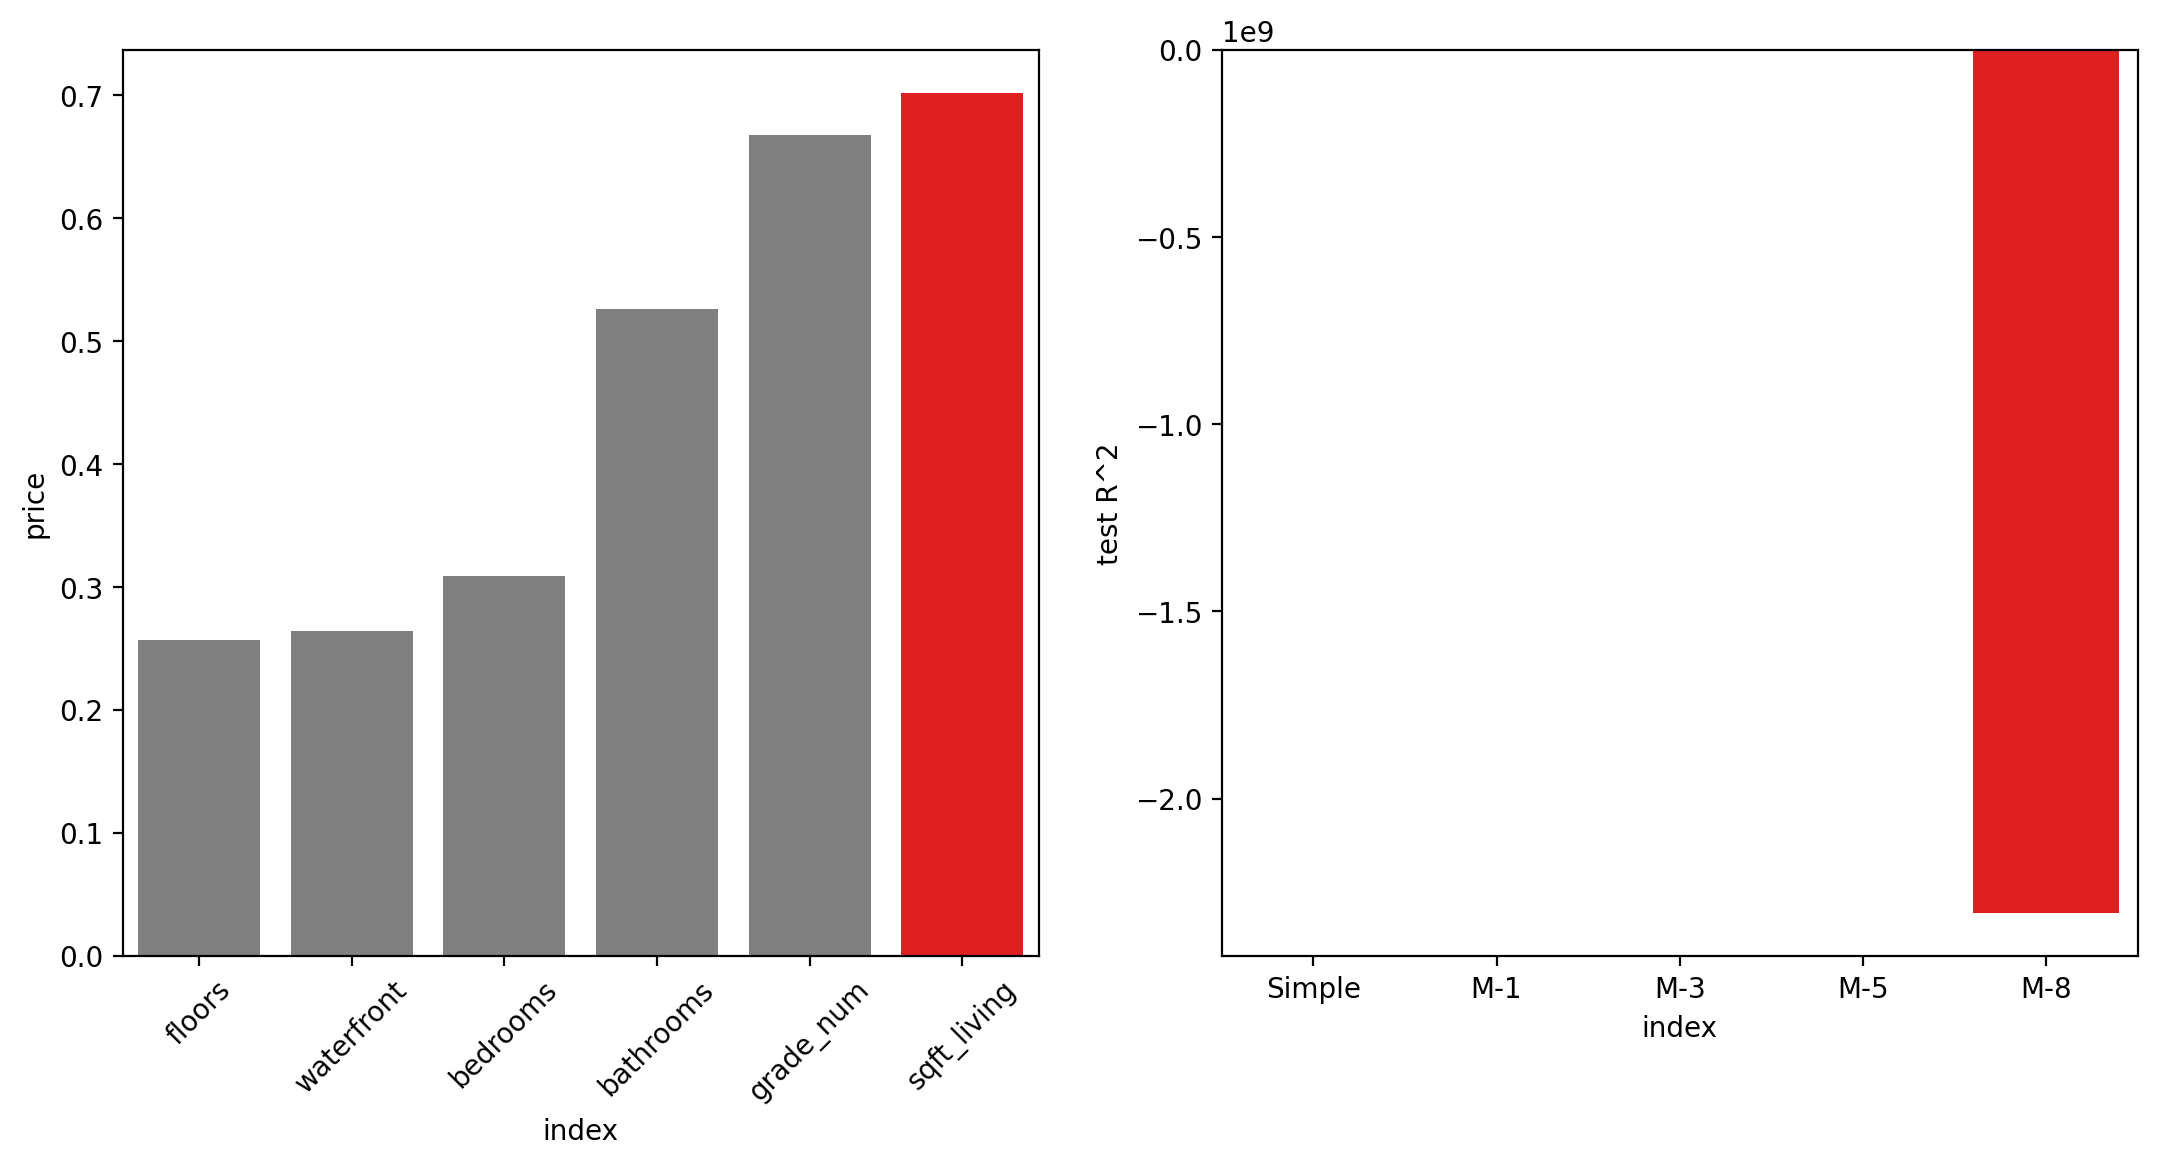

In [58]:
heat_map_price = heat_map_price.reset_index().sort_values(by='price', ascending=True)
heat_map_price = heat_map_price[(heat_map_price['index']=='sqft_living')|
                                (heat_map_price['index']=='grade_num')|
                                (heat_map_price['index']=='bathrooms')|
                                (heat_map_price['index']=='bedrooms')|
                                (heat_map_price['index']=='waterfront')|
                                (heat_map_price['index']=='floors')]

regression_score = regression_score.reset_index()

fig, ax, ax2) = plt.subplots(figsize=(13,6), ncols=2, dpi=200)

x_cor = heat_map_price['index']
y_cor = heat_map_price['price']
clrs=['grey' if (x != 'sqft_living') else 'red' for x in x_cor]

sns.barplot(x=x_cor, y=y_cor, palette=clrs, ax=ax1)
ax1.tick_params(axis='x', rotation=45)

x_reg = regression_score['index']
y_reg = regression_score['test R^2']
clrs=['grey' if x != 'M-8' else 'red' for x in x_reg]

sns.barplot(x=x_reg, y=y_reg, palette=clrs, ax=ax2);